In [1]:
import requests as req 
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import time
import os
from urllib.request import urlretrieve
from selenium import webdriver as wb 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.common.by import By

In [2]:
apart = pd.read_csv('data/Apart Deal.csv')
apart

## 지역코드, 법정동, 아파트, 지번, 전용면적(?), 층, 건축년도,

C:\Users\smhrd\AppData\Local\Temp\ipykernel_8588\2692137691.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  apart = pd.read_csv('data/Apart Deal.csv')


,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700
...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500"
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700"
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300"
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,"25,500"


In [ ]:
apart.isna().sum()

In [5]:
## 아파트 종류 36441개


apart_apart = apart.groupby('아파트').agg(count_apart=('아파트','count'))
apart_apart


,count_apart
아파트,
(1-102),6
(1018-8),4
(1028-0),67
(1088-1),4
(1101-1),127
...,...
힐팰리스,16
힐포레아파트,10
힐하우스,6


In [6]:
# 동의 종류 3214개

apart_dong = apart.groupby('법정동').agg(dong_count=('법정동','count'))
apart_dong

,dong_count
법정동,
가경동,6127
가곡동,2217
가남읍 신해리,1150
가남읍 심석리,282
가남읍 태평리,187
...,...
흥해읍 이인리,942
흥해읍 중성리,78
흥해읍 초곡리,958


In [20]:
#층수 종류 140개
apart_floor = apart.groupby('층',as_index = False).agg(floor_count=('층','count'))
apart_floor

,층,floor_count
0,-4,1
1,-3,8
2,-2,23
3,-1,228
4,1,307768
...,...,...
135,52,1
136,6,3997
137,7,3973
138,8,3817


In [21]:
# 지역코드의 종류 249개

apart_geocode = apart.groupby('지역코드',as_index = False).agg(geocode_count=('지역코드','count'))
apart_geocode

,지역코드,geocode_count
0,11110.0,5134
1,11140.0,8145
2,11170.0,12719
3,11200.0,23852
4,11215.0,12402
...,...,...
244,48870.0,1153
245,48880.0,3899
246,48890.0,873
247,50110.0,17303


In [22]:
#건축년도의 종류 61개

apart_built_year = apart.groupby('건축년도',as_index = False).agg(built_year_count=('건축년도','count'))
apart_built_year

,건축년도,built_year_count
0,1961.0,26
1,1962.0,474
2,1965.0,5
3,1966.0,34
4,1967.0,29
...,...,...
56,2019.0,59986
57,2020.0,23479
58,2021.0,9703
59,2022.0,7868


In [31]:
#지번의 종류 19051개

apart_area_code = apart.groupby('지번',as_index = False).agg(area_code_count=('지번','count'))
apart_area_code

,지번,area_code_count
0,1,7566
1,1-1,2501
2,1-10,119
3,1-102,6
4,1-106,22
...,...,...
19046,지구BL 34-7,2
19047,지구BL 4,13
19048,지구BL 5,46
19049,지구BL 7,2


In [7]:
# 거래년도의 종류
apart_copy = apart.copy()

apart_copy['거래일(년)'] = apart_copy['거래일']

apart_copy

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,거래일(년)
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700,5/30/2020 0:00
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500,1/3/2020 0:00
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500,1/3/2020 0:00
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000,1/3/2020 0:00
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700,1/4/2020 0:00
...,...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500",2023-06-29 00:00:00
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700",2023-07-04 00:00:00
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300",2023-07-04 00:00:00
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,"25,500",2023-07-01 00:00:00


# 지번과 건축년도 데이터 전처리

In [13]:
nanUpdate = apart.copy()

In [14]:
nanUpdate

const_list = []
const_list.append(['조촌동', '더샵디오션시티', '2021'])
const_list.append(['무실동', '더샵원주센트럴파크1단지', '2021'])
const_list.append(['중앙동', '힐스테이트속초센트럴', '2021'])
const_list.append(['가평읍 읍내리', '가평코아루', '2021'])
const_list.append(['송도동', '더샵송도프라임뷰25BL', '2022'])
const_list.append(['오산동', '동탄역유림노르웨이숲', '2022'])
const_list.append(['양촌읍 양곡리', 'My더퍼스트', '2022'])
const_list.append(['신암동', 'SG펠리체', '2021'])


for i in const_list :
    temp = nanUpdate[(nanUpdate['법정동']==i[0]) & (nanUpdate['아파트']==i[1])].fillna(i[2]) 
    nanUpdate[(nanUpdate['법정동']==i[0]) & (nanUpdate['아파트']==i[1])] = temp

In [15]:
## 지번 NaN 값 채우기 


## 
jibun_list = []
jibun_list.append(['남양읍 남양리', '동광뷰엘', '2235'])
jibun_list.append(['내곡동', '서초포레스타2단지', '384'])
jibun_list.append(['자곡동', '래미안포레', '687'])
jibun_list.append(['신원동', '힐스테이트 서초 젠트리스', '557'])
jibun_list.append(['나성동', '나릿재마을1단지', '259-1'])

for i in jibun_list :
    temp = nanUpdate[(nanUpdate['법정동']==i[0]) & (nanUpdate['아파트']==i[1])].fillna(i[2])
    nanUpdate[(nanUpdate['법정동']==i[0]) & (nanUpdate['아파트']==i[1])] = temp
    
nanUpdate

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700
...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500"
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700"
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300"
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,"25,500"


In [16]:
apartUpdate = nanUpdate.copy()
apartUpdate

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700
...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500"
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700"
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300"
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,"25,500"


In [14]:
apartUpdate['거래일'].iloc[1046639:]

1046639         2/19/2018 0:00
1046640    2018-03-27 00:00:00
1046641    2018-01-03 00:00:00
1046642    2018-01-04 00:00:00
1046643    2018-01-17 00:00:00
                  ...         
5002834    2023-06-29 00:00:00
5002835    2023-07-04 00:00:00
5002836    2023-07-04 00:00:00
5002837    2023-07-01 00:00:00
5002838    2023-07-01 00:00:00
Name: 거래일, Length: 3956200, dtype: object

In [20]:
date = apartUpdate['거래일'].iloc[:1046640]
date

0          5/30/2020 0:00
1           1/3/2020 0:00
2           1/3/2020 0:00
3           1/3/2020 0:00
4           1/4/2020 0:00
                ...      
1046635     2/3/2018 0:00
1046636     2/5/2018 0:00
1046637     2/6/2018 0:00
1046638     2/9/2018 0:00
1046639    2/19/2018 0:00
Name: 거래일, Length: 1046640, dtype: object

In [23]:
date_2 = pd.DataFrame(date)
date_2

,거래일
0,5/30/2020 0:00
1,1/3/2020 0:00
2,1/3/2020 0:00
3,1/3/2020 0:00
4,1/4/2020 0:00
...,...
1046635,2/3/2018 0:00
1046636,2/5/2018 0:00
1046637,2/6/2018 0:00
1046638,2/9/2018 0:00


# 1046640데이터 년 월 일 출력 << 최종

In [24]:
date_2

,거래일
0,5/30/2020 0:00
1,1/3/2020 0:00
2,1/3/2020 0:00
3,1/3/2020 0:00
4,1/4/2020 0:00
...,...
1046635,2/3/2018 0:00
1046636,2/5/2018 0:00
1046637,2/6/2018 0:00
1046638,2/9/2018 0:00


In [25]:
month_list = []
day_list = []
year_list = []

for i in range(len(date_2['거래일'])):
    month, day, year = date_2['거래일'][i].split("/")
    year_list.append(year[:4])
    month_list.append(month)
    day_list.append(day)

In [26]:
dic = {'year' : year_list, 'month' : month_list, 'day':day_list, '거래일' : date_2['거래일']}

In [27]:
date_2_1 = pd.DataFrame(dic)
date_2_1

,year,month,day,거래일
0,2020,5,30,5/30/2020 0:00
1,2020,1,3,1/3/2020 0:00
2,2020,1,3,1/3/2020 0:00
3,2020,1,3,1/3/2020 0:00
4,2020,1,4,1/4/2020 0:00
...,...,...,...,...
1046635,2018,2,3,2/3/2018 0:00
1046636,2018,2,5,2/5/2018 0:00
1046637,2018,2,6,2/6/2018 0:00
1046638,2018,2,9,2/9/2018 0:00


# 1046640데이터 이전의 (월) 추출

In [40]:
## 월 데이터

# 예시 데이터프레임 생성
data = date_2['거래일']

# 특정 문자 이전까지의 문자열을 추출하는 함수 정의
def extract_before_delimiter(s, delimiter):
    index = s.find(delimiter)
    return s[:index] if index != -1 else s

# 데이터프레임의 특정 열에 함수를 적용하여 새로운 열 생성
delimiter = "/"
date_2['month'] = date_2['거래일'].apply(lambda x: extract_before_delimiter(x, delimiter))

# 결과 출력
date_2

,거래일,year,month
0,5/30/2020 0:00,2020,5
1,1/3/2020 0:00,2020,1
2,1/3/2020 0:00,2020,1
3,1/3/2020 0:00,2020,1
4,1/4/2020 0:00,2020,1
...,...,...,...
1046635,2/3/2018 0:00,2018,2
1046636,2/5/2018 0:00,2018,2
1046637,2/6/2018 0:00,2018,2
1046638,2/9/2018 0:00,2018,2


# 1046640데이터 이전의 (일) 추출

In [41]:


import pandas as pd

# 예시 데이터프레임 생성

# 특정 문자열과 특정 문자열 사이의 문자열을 추출하는 함수 정의
def extract_between_delimiters(s, delimiter1, delimiter2):
    start_index = s.find(delimiter1)
    end_index = s.find(delimiter2, start_index + len(delimiter1))  # delimiter1 이후부터 검색

    if start_index != -1 and end_index != -1:
        return s[start_index + len(delimiter1):end_index]
    else:
        return ''

# 데이터프레임의 특정 열에 함수를 적용하여 새로운 열 생성
delimiter1 = "/"
delimiter2 = "/"
date_2['day'] = date_2['거래일'].apply(lambda x: extract_between_delimiters(x, delimiter1, delimiter2))

# 결과 출력
date_2

,거래일,year,month,day
0,5/30/2020 0:00,2020,5,30
1,1/3/2020 0:00,2020,1,3
2,1/3/2020 0:00,2020,1,3
3,1/3/2020 0:00,2020,1,3
4,1/4/2020 0:00,2020,1,4
...,...,...,...,...
1046635,2/3/2018 0:00,2018,2,3
1046636,2/5/2018 0:00,2018,2,5
1046637,2/6/2018 0:00,2018,2,6
1046638,2/9/2018 0:00,2018,2,9


# 1046640데이터 이상

In [28]:
date_3 = apartUpdate['거래일'].iloc[1046640:]
date_3

1046640    2018-03-27 00:00:00
1046641    2018-01-03 00:00:00
1046642    2018-01-04 00:00:00
1046643    2018-01-17 00:00:00
1046644    2018-01-25 00:00:00
                  ...         
5002834    2023-06-29 00:00:00
5002835    2023-07-04 00:00:00
5002836    2023-07-04 00:00:00
5002837    2023-07-01 00:00:00
5002838    2023-07-01 00:00:00
Name: 거래일, Length: 3956199, dtype: object

In [29]:
date_4 = pd.DataFrame(date_3)
date_4

,거래일
1046640,2018-03-27 00:00:00
1046641,2018-01-03 00:00:00
1046642,2018-01-04 00:00:00
1046643,2018-01-17 00:00:00
1046644,2018-01-25 00:00:00
...,...
5002834,2023-06-29 00:00:00
5002835,2023-07-04 00:00:00
5002836,2023-07-04 00:00:00
5002837,2023-07-01 00:00:00


# 1046640데이터 이상의 (년) 추출

In [30]:
## 년 데이터



# 특정 문자 이전까지의 문자열을 추출하는 함수 정의
def extract_before_delimiter(s, delimiter):
    index = s.find(delimiter)
    return s[:index] if index != -1 else s

# 데이터프레임의 특정 열에 함수를 적용하여 새로운 열 생성
delimiter = "-"
date_4['year'] = date_4['거래일'].apply(lambda x: extract_before_delimiter(x, delimiter))

# 결과 출력
date_4

,거래일,year
1046640,2018-03-27 00:00:00,2018
1046641,2018-01-03 00:00:00,2018
1046642,2018-01-04 00:00:00,2018
1046643,2018-01-17 00:00:00,2018
1046644,2018-01-25 00:00:00,2018
...,...,...
5002834,2023-06-29 00:00:00,2023
5002835,2023-07-04 00:00:00,2023
5002836,2023-07-04 00:00:00,2023
5002837,2023-07-01 00:00:00,2023


# 1046640데이터 이상의 (월) 추출

In [31]:
# 월 데이터

# 특정 문자열과 특정 문자열 사이의 문자열을 추출하는 함수 정의
def extract_between_delimiters(s, delimiter1, delimiter2):
    start_index = s.find(delimiter1)
    end_index = s.find(delimiter2, start_index + len(delimiter1))  # delimiter1 이후부터 검색

    if start_index != -1 and end_index != -1:
        return s[start_index + len(delimiter1):end_index]
    else:
        return ''

# 데이터프레임의 특정 열에 함수를 적용하여 새로운 열 생성
delimiter1 = "-"
delimiter2 = "-"
date_4['month'] = date_4['거래일'].apply(lambda x: extract_between_delimiters(x, delimiter1, delimiter2))

# 결과 출력
date_4

,거래일,year,month
1046640,2018-03-27 00:00:00,2018,03
1046641,2018-01-03 00:00:00,2018,01
1046642,2018-01-04 00:00:00,2018,01
1046643,2018-01-17 00:00:00,2018,01
1046644,2018-01-25 00:00:00,2018,01
...,...,...,...
5002834,2023-06-29 00:00:00,2023,06
5002835,2023-07-04 00:00:00,2023,07
5002836,2023-07-04 00:00:00,2023,07
5002837,2023-07-01 00:00:00,2023,07


# 1046640데이터 이상의 (일) 추출

In [32]:
# 일데이터

date_4['day'] = date_4['거래일'].str[-11:-9]
date_4

,거래일,year,month,day
1046640,2018-03-27 00:00:00,2018,03,27
1046641,2018-01-03 00:00:00,2018,01,03
1046642,2018-01-04 00:00:00,2018,01,04
1046643,2018-01-17 00:00:00,2018,01,17
1046644,2018-01-25 00:00:00,2018,01,25
...,...,...,...,...
5002834,2023-06-29 00:00:00,2023,06,29
5002835,2023-07-04 00:00:00,2023,07,04
5002836,2023-07-04 00:00:00,2023,07,04
5002837,2023-07-01 00:00:00,2023,07,01


In [247]:
date_4

,거래일,year,month,day
1046640,2018-03-27 00:00:00,2018,03,27
1046641,2018-01-03 00:00:00,2018,01,03
1046642,2018-01-04 00:00:00,2018,01,04
1046643,2018-01-17 00:00:00,2018,01,17
1046644,2018-01-25 00:00:00,2018,01,25
...,...,...,...,...
5002834,2023-06-29 00:00:00,2023,06,29
5002835,2023-07-04 00:00:00,2023,07,04
5002836,2023-07-04 00:00:00,2023,07,04
5002837,2023-07-01 00:00:00,2023,07,01


In [33]:
date_real = pd.concat([date_2,date_4], ignore_index = True)
date_real

,거래일,year,month,day
0,5/30/2020 0:00,NaN,NaN,NaN
1,1/3/2020 0:00,NaN,NaN,NaN
2,1/3/2020 0:00,NaN,NaN,NaN
3,1/3/2020 0:00,NaN,NaN,NaN
4,1/4/2020 0:00,NaN,NaN,NaN
...,...,...,...,...
5002834,2023-06-29 00:00:00,2023,06,29
5002835,2023-07-04 00:00:00,2023,07,04
5002836,2023-07-04 00:00:00,2023,07,04
5002837,2023-07-01 00:00:00,2023,07,01


# 최종 데이터 정제 방법 활용하여 년,월,일 통합 및 csv파일 추출

In [251]:
date_real_real = pd.concat([date_2_1,date_4], ignore_index = True)
date_real_real

,year,month,day,거래일
0,2020,5,30,5/30/2020 0:00
1,2020,1,3,1/3/2020 0:00
2,2020,1,3,1/3/2020 0:00
3,2020,1,3,1/3/2020 0:00
4,2020,1,4,1/4/2020 0:00
...,...,...,...,...
5002834,2023,06,29,2023-06-29 00:00:00
5002835,2023,07,04,2023-07-04 00:00:00
5002836,2023,07,04,2023-07-04 00:00:00
5002837,2023,07,01,2023-07-01 00:00:00


In [259]:
date_real_real = date_real_real.drop('거래일', axis = 1)
date_real_real

KeyError: "['거래일'] not found in axis"

In [260]:
date_real_real.to_csv('date_oranize_real_real.csv')


# month, day 값 앞에 있는 0 지우기

In [107]:
date_real_copy = date_real.copy()

In [110]:
date_real_copy['month'] = date_real_copy['month'].astype(int).astype(str)
date_real_copy['day'] = date_real_copy['day'].astype(int).astype(str)
date_real_copy

,거래일,year,month,day
0,5/30/2020 0:00,2020,5,30
1,1/3/2020 0:00,2020,1,3
2,1/3/2020 0:00,2020,1,3
3,1/3/2020 0:00,2020,1,3
4,1/4/2020 0:00,2020,1,4
...,...,...,...,...
5002834,2023-06-29 00:00:00,2023,6,29
5002835,2023-07-04 00:00:00,2023,7,4
5002836,2023-07-04 00:00:00,2023,7,4
5002837,2023-07-01 00:00:00,2023,7,1


In [114]:
date_real_copy_real = date_real_copy.drop('거래일', axis=1)

In [115]:
date_real_copy_real

,year,month,day
0,2020,5,30
1,2020,1,3
2,2020,1,3
3,2020,1,3
4,2020,1,4
...,...,...,...
5002834,2023,6,29
5002835,2023,7,4
5002836,2023,7,4
5002837,2023,7,1


In [116]:
date_real_copy_real.to_csv('budongsan_date_organize_real.csv')

In [151]:
apartUpdate

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700
...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500"
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700"
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300"
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,"25,500"


In [152]:
apartUpdate_date = apartUpdate.copy()

In [153]:
apartUpdate_date = pd.concat([apartUpdate_date,date_real_copy_real],axis=1)
apartUpdate_date

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,year,month,day,시도,지역이름
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700,2020,5,30,울산,중구
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500,2020,1,3,울산,중구
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500,2020,1,3,울산,중구
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000,2020,1,3,울산,중구
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700,2020,1,4,울산,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500",2023,6,29,제주,서귀포시
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700",2023,7,4,제주,서귀포시
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300",2023,7,4,제주,서귀포시
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,"25,500",2023,7,1,제주,서귀포시


In [136]:
apartUpdate_date

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,year,month,day,시도,지역이름
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700,2020,5,30,울산,중구
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500,2020,1,3,울산,중구
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500,2020,1,3,울산,중구
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000,2020,1,3,울산,중구
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700,2020,1,4,울산,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500",2023,6,29,제주,서귀포시
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700",2023,7,4,제주,서귀포시
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300",2023,7,4,제주,서귀포시
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,"25,500",2023,7,1,제주,서귀포시


In [118]:
date_real_copy_real_sido = date_real_copy_real

In [119]:
date_real_copy_real_sido['시도'] = sido['시도']
date_real_copy_real_sido['지역이름'] = sido['지역이름']

In [120]:
date_real_copy_real_sido

,year,month,day,시도,지역이름
0,2020,5,30,울산,중구
1,2020,1,3,울산,중구
2,2020,1,3,울산,중구
3,2020,1,3,울산,중구
4,2020,1,4,울산,중구
...,...,...,...,...,...
5002834,2023,6,29,제주,서귀포시
5002835,2023,7,4,제주,서귀포시
5002836,2023,7,4,제주,서귀포시
5002837,2023,7,1,제주,서귀포시


In [69]:
date_real.to_csv('budongsan_date_organize.csv')

In [74]:
apartUpdate_real = apartUpdate

In [261]:
apartUpdate_date['year']  = date_real_real['year']
apartUpdate_date['month']  = date_real_real['month']
apartUpdate_date['day']  = date_real_real['day']


In [76]:
apartUpdate_real

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,year,month,day
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700,2020,5,30
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500,2020,1,3
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500,2020,1,3
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000,2020,1,3
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700,2020,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500",2023,06,29
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700",2023,07,04
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300",2023,07,04
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,"25,500",2023,07,01


# 시도 컬럼 추가

In [78]:
sido = pd.read_csv('data/시도컬럼.csv')
sido

,Unnamed: 0,지역코드,시도,지역이름
0,0,31110,울산,중구
1,1,31110,울산,중구
2,2,31110,울산,중구
3,3,31110,울산,중구
4,4,31110,울산,중구
...,...,...,...,...
5002834,5002834,50130,제주,서귀포시
5002835,5002835,50130,제주,서귀포시
5002836,5002836,50130,제주,서귀포시
5002837,5002837,50130,제주,서귀포시


In [83]:
apartUpdate_real_real = apartUpdate_real

In [84]:
apartUpdate_real_real['시도'] = sido['시도']
apartUpdate_real_real['지역이름'] = sido['지역이름']

In [85]:
apartUpdate_real_real

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,year,month,day,시도,지역이름
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700,2020,5,30,울산,중구
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500,2020,1,3,울산,중구
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500,2020,1,3,울산,중구
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000,2020,1,3,울산,중구
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700,2020,1,4,울산,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500",2023,06,29,제주,서귀포시
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700",2023,07,04,제주,서귀포시
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300",2023,07,04,제주,서귀포시
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,"25,500",2023,07,01,제주,서귀포시


# 거래금액 ',' 제거하고 int 형으로전환

In [7]:
apart['거래금액'] = apart['거래금액'].astype(str)
apart['거래금액'] = apart['거래금액'].str.replace(',', '')
apart['거래금액'] = apart['거래금액'].astype(int)

In [10]:
apart.sort_values('거래금액',ascending = False).head(50)

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
4701011,11680.0,청담동,2022-04-28 00:00:00,PH129,129,273.9600,16.0,2020.0,1450000
4364227,11680.0,청담동,2022-04-28 00:00:00,PH129,129,273.9600,16,2020.0,1450000
4686111,11170.0,한남동,2022-04-30 00:00:00,파르크한남,410,268.6700,5.0,2020.0,1350000
4349327,11170.0,한남동,2022-04-30 00:00:00,파르크한남,410,268.6700,5,2020.0,1350000
4349828,11200.0,성수동1가,2022-09-30 00:00:00,아크로서울포레스트,685-700,264.5460,47,2020.0,1300000
4686612,11200.0,성수동1가,2022-09-30 00:00:00,아크로서울포레스트,685-700,264.5460,47.0,2020.0,1300000
4315323,11170.0,한남동,2021-12-13,파르크한남,410,268.9500,2,2020.0,1200000
4315300,11170.0,한남동,2021-11-26,파르크한남,410,268.6700,4,2020.0,1170000
4343664,11680.0,청담동,2021-03-04,PH129,129,273.9600,14,2020.0,1150000
4315299,11170.0,한남동,2021-11-24,파르크한남,410,268.9500,3,2020.0,1150000


In [6]:
apartUpdate_date['거래금액'] = apartUpdate_date['거래금액'].astype(str)
apartUpdate_date['거래금액'] = apartUpdate_date['거래금액'].str.replace(',', '')
apartUpdate_date['거래금액'] = apartUpdate_date['거래금액'].astype(int)

NameError: name 'apartUpdate_date' is not defined

In [165]:
apartUpdate_date['면적당거래금액'] = round(apartUpdate_date['거래금액']/apartUpdate_date['전용면적'],0)

In [166]:
apartUpdate_date

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,year,month,day,시도,지역이름,면적당거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700,2020,5,30,울산,중구,197.0
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500,2020,1,3,울산,중구,349.0
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500,2020,1,3,울산,중구,429.0
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000,2020,1,3,울산,중구,362.0
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700,2020,1,4,울산,중구,455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,19500,2023,6,29,제주,서귀포시,341.0
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,21700,2023,7,4,제주,서귀포시,435.0
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,9300,2023,7,4,제주,서귀포시,205.0
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,25500,2023,7,1,제주,서귀포시,492.0


# 건축년도의 종류 확인

In [169]:
apartUpdate_date['건축년도'].unique()

array([1991.0, 2006.0, 2007.0, 1985.0, 1997.0, 1992.0, 2002.0, 1990.0,
       2014.0, 2015.0, 2005.0, 1993.0, 2017.0, 1983.0, 1989.0, 2018.0,
       1979.0, 2016.0, 1978.0, 1996.0, 1995.0, 2004.0, 1998.0, 2008.0,
       2001.0, 2010.0, 1994.0, 1982.0, 2009.0, 2019.0, 1984.0, 2013.0,
       1987.0, 1980.0, 1986.0, 1999.0, 2003.0, 2000.0, 2012.0, 2020.0,
       2011.0, 1988.0, 1981.0, 1977.0, 1975.0, 1971.0, 1976.0, 1973.0,
       1966.0, 1968.0, 1970.0, 1972.0, 1969.0, 1974.0, 1961.0, 1967.0,
       1962.0, 1965.0, 2021.0, 2022.0, 2023.0, '2021', '2022'],
      dtype=object)

In [191]:
gunchook_year

array([1961, 1962, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2021, 2022, 2022, 2023])

# 건축년도 값을 int로 전환

In [217]:
apartUpdate_date['건축년도'] = apartUpdate_date['건축년도'].astype(int)

0          1991
1          2006
2          2007
3          2006
4          2007
           ... 
5002834    2019
5002835    1999
5002836    2000
5002837    2003
5002838    2021
Name: 건축년도, Length: 5002839, dtype: int32

# 건축년도를 10년 단위로 나눠서, 새로운 컬럼으로 생성

In [198]:
apartUpdate_date['건축년도'] = apartUpdate_date['건축년도'].astype(int)

In [200]:
apartUpdate_date['건축년도(10년)'] = (apartUpdate_date['건축년도']//10)*10

In [201]:
apartUpdate_date

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,year,month,day,시도,지역이름,면적당거래금액,건축년도(10년)
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991,26700,2020,5,30,울산,중구,197.0,1990
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006,35500,2020,1,3,울산,중구,349.0,2000
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007,36500,2020,1,3,울산,중구,429.0,2000
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006,43000,2020,1,3,울산,중구,362.0,2000
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007,38700,2020,1,4,울산,중구,455.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019,19500,2023,6,29,제주,서귀포시,341.0,2010
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999,21700,2023,7,4,제주,서귀포시,435.0,1990
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000,9300,2023,7,4,제주,서귀포시,205.0,2000
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003,25500,2023,7,1,제주,서귀포시,492.0,2000


In [315]:
gunchook_10 = pd.DataFrame(apartUpdate_date['건축년도(10년)'])
gunchook_10

,건축년도(10년)
0,1990
1,2000
2,2000
3,2000
4,2000
...,...
5002834,2010
5002835,1990
5002836,2000
5002837,2000


In [316]:
gunchook_10.to_csv('gunchook_per10.csv')

# 도시 기준으로 건축년도(10년주기)로 묶어서 면적당 거래 금액 뽑아내기

In [209]:
dosi_gunchook_munguk_cash = apartUpdate_date.groupby(['시도','건축년도(10년)'],as_index = False).agg(munguck_cash_gunchook= ('면적당거래금액','mean'))

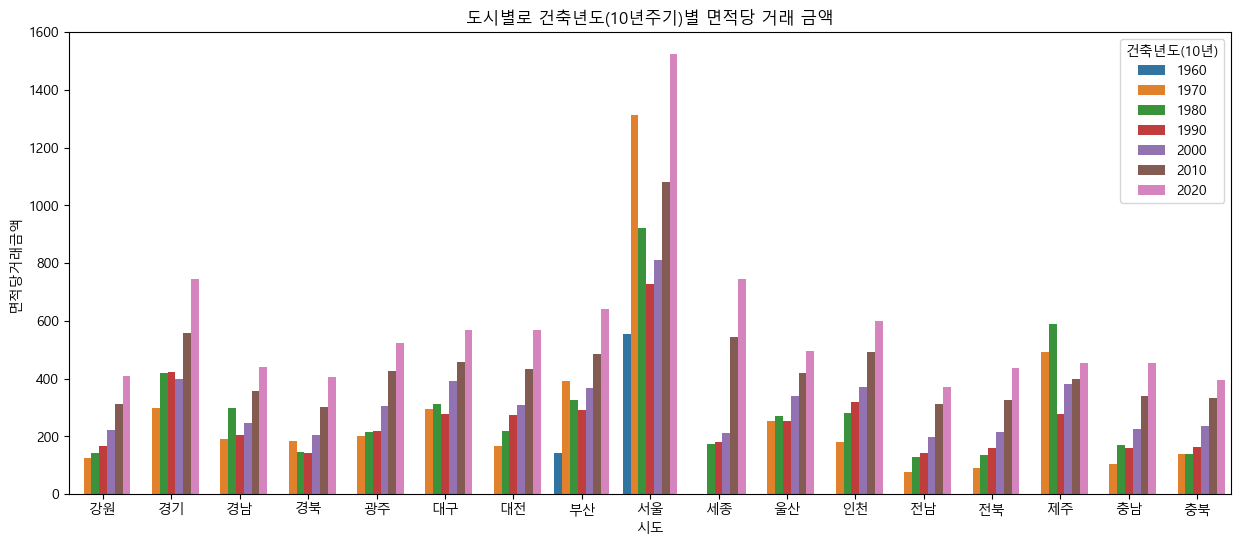

In [310]:
plt.figure(figsize = (15,6)) 

sns.barplot(data = dosi_gunchook_munguk_cash, x = '시도' , y='munguck_cash_gunchook', hue ='건축년도(10년)')

plt.ylabel('면적당거래금액')

plt.title('도시별로 건축년도(10년주기)별 면적당 거래 금액')

plt.show()

In [265]:
apartUpdate_date

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,year,month,day,시도,지역이름,면적당거래금액,건축년도(10년)
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991,26700,2020,5,30,울산,중구,197.0,1990
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006,35500,2020,1,3,울산,중구,349.0,2000
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007,36500,2020,1,3,울산,중구,429.0,2000
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006,43000,2020,1,3,울산,중구,362.0,2000
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007,38700,2020,1,4,울산,중구,455.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019,19500,2023,06,29,제주,서귀포시,341.0,2010
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999,21700,2023,07,04,제주,서귀포시,435.0,1990
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000,9300,2023,07,04,제주,서귀포시,205.0,2000
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003,25500,2023,07,01,제주,서귀포시,492.0,2000


# 거래년도별 총합 거래금액과 거래 건수 총합 비교

In [274]:
year_deal_total = apartUpdate_date.groupby('year',as_index = False).agg(total_deal =('거래금액','sum'),count_deal =('거래금액','count'))
year_deal_total

,year,total_deal,count_deal
0,2015,18835556669,712884
1,2016,18759276799,663671
2,2017,17758046371,561726
3,2018,17109512477,535788
4,2019,24701497486,786629
5,2020,31331977947,984117
6,2021,5207990010,101631
7,2022,12767836917,421446
8,2023,9018736606,234947


<BarContainer object of 9 artists>

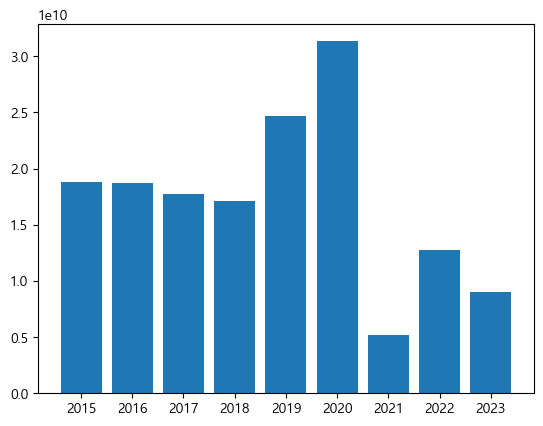

In [281]:
plt.bar(year_deal_total['year'],year_deal_total['total_deal'])

plt.bar(year_deal_total['year'],year_deal_total['count_deal'])

<Figure size 1500x600 with 0 Axes>

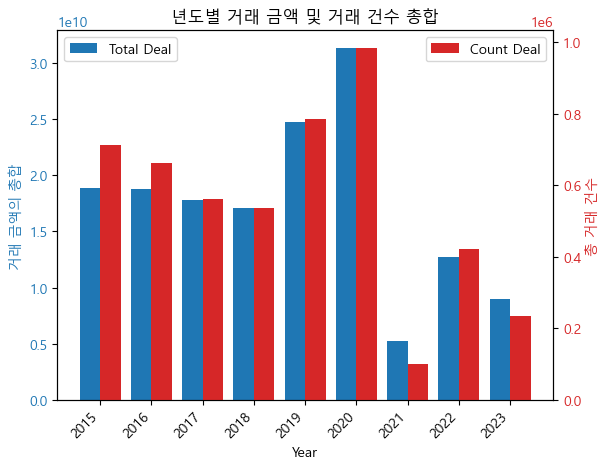

In [287]:
# 데이터프레임의 'year' 열을 숫자로 변환
year_deal_total['year'] = year_deal_total['year'].astype(int)

# 그래프 그리기
fig, ax = plt.subplots()

# 왼쪽 Y축 (total_deal)
ax.set_xlabel('Year')
ax.set_ylabel('거래 금액의 총합', color='tab:blue')
ax.bar(np.array(year_deal_total['year']) - 0.2, year_deal_total['total_deal'], color='tab:blue', width=0.4, label='Total Deal')
ax.tick_params(axis='y', labelcolor='tab:blue')

# 오른쪽 Y축 (count_deal)
ax2 = ax.twinx()
ax2.set_ylabel('총 거래 건수', color='tab:red')
ax2.bar(np.array(year_deal_total['year']) + 0.2, year_deal_total['count_deal'], color='tab:red', width=0.4, label='Count Deal')
ax2.tick_params(axis='y', labelcolor='tab:red')

# 범례 추가
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# x축에 년도별 라벨 전부 표시
ax.set_xticks(np.array(year_deal_total['year']))
ax.set_xticklabels(year_deal_total['year'], rotation=45, ha='right')

# 그래프 출력
plt.title('년도별 거래 금액 및 거래 건수 총합')
plt.show()

# 거래금액 평균이 가장 높은 아파트 (거래 건수 포함)

In [291]:
apart_deal_mean_count = apartUpdate_date.groupby('아파트',as_index=False).agg(mean_deal_cash =('거래금액','mean'),count_deal=('거래금액','count'))
apart_deal_mean_count

,아파트,mean_deal_cash,count_deal
0,(1-102),11750.000000,6
1,(1018-8),16150.000000,4
2,(1028-0),6253.731343,67
3,(1088-1),8069.500000,4
4,(1101-1),11562.795276,127
...,...,...,...
36436,힐팰리스,37025.000000,16
36437,힐포레아파트,15140.000000,10
36438,힐하우스,33400.000000,6
36439,힐하우스(577-79),59000.000000,1


In [299]:
apart_deal_mean_count['mean_deal_cash'] = round(apart_deal_mean_count['mean_deal_cash'],0)
apart_deal_mean_count

,아파트,mean_deal_cash,count_deal
0,(1-102),11750.0,6
1,(1018-8),16150.0,4
2,(1028-0),6250.0,67
3,(1088-1),8070.0,4
4,(1101-1),11560.0,127
...,...,...,...
36436,힐팰리스,37020.0,16
36437,힐포레아파트,15140.0,10
36438,힐하우스,33400.0,6
36439,힐하우스(577-79),59000.0,1


In [302]:
apart_deal_mean_count_sort = apart_deal_mean_count.sort_values(by = 'mean_deal_cash',ascending = False)

In [305]:
apart_deal_mean_count_sort_top15 = apart_deal_mean_count_sort.head(15)

In [306]:
apart_deal_mean_count_sort_top15

,아파트,mean_deal_cash,count_deal
723,PH129,1195810.0,5
31543,파르크한남,1185710.0,7
10681,르가든더메인한남,774290.0,7
4897,나인원한남,772000.0,14
35884,효성빌라청담101(B동),747000.0,2
21575,아크로서울포레스트,683000.0,14
16272,상지리츠빌카일룸2차,638380.0,8
1860,갤러리아포레,637170.0,12
29807,청담어퍼하우스,633330.0,3
16269,상지리츠빌카일룸,580230.0,6


C:\Users\smhrd\AppData\Local\Temp\ipykernel_5328\1059266215.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(apart_deal_mean_count_sort_top15['아파트'], rotation=45, ha='right')  # 라벨 회전 및 정렬


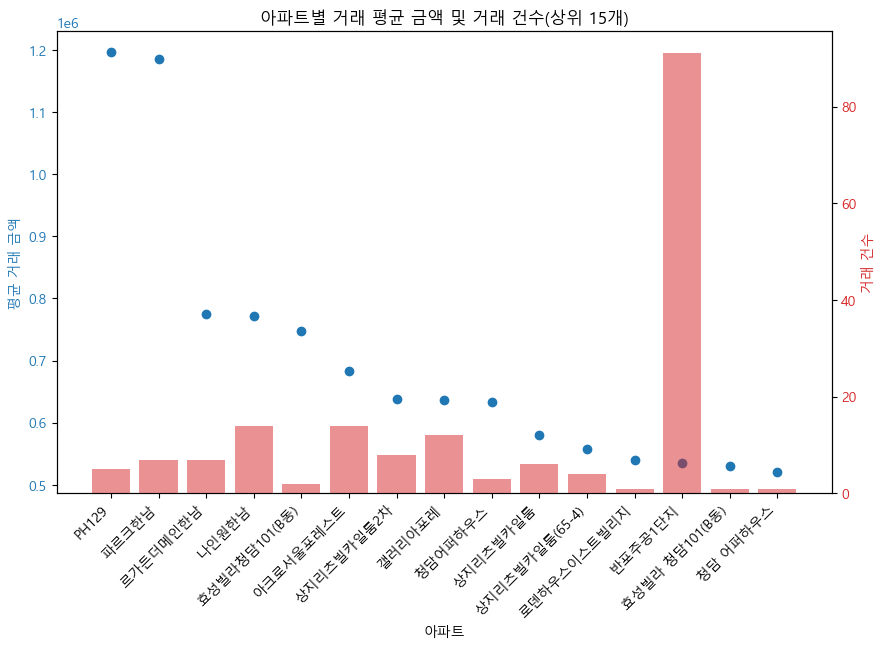

In [312]:
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# scatter plot을 이용하여 mean_deal_cash 그래프 표현
ax1.set_xlabel('아파트')
ax1.set_ylabel('평균 거래 금액', color='tab:blue')
ax1.scatter(apart_deal_mean_count_sort_top15['아파트'], apart_deal_mean_count_sort_top15['mean_deal_cash'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticklabels(apart_deal_mean_count_sort_top15['아파트'], rotation=45, ha='right')  # 라벨 회전 및 정렬

# 오른쪽 Y축 (count_deal)
ax2 = ax1.twinx()
ax2.set_ylabel('거래 건수', color='tab:red')
ax2.bar(apart_deal_mean_count_sort_top15['아파트'], apart_deal_mean_count_sort_top15['count_deal'], color='tab:red', alpha=0.5)  # alpha는 투명도 조절
ax2.tick_params(axis='y', labelcolor='tab:red')

# 그래프 출력
plt.title('아파트별 거래 평균 금액 및 거래 건수(상위 15개)')
plt.show()

In [ ]:
apartUpdate_date['평수'] = apartCopy['전용면적'].astype(int)/3.3

# 가장 자주 거래된 아파트 (투기 과열 지역)

In [345]:
apart_speculation = apartUpdate_date.groupby(['아파트','법정동','지번','시도'],as_index=False).agg(count_apt = ('아파트','count')).sort_values(by='count_apt',ascending=False)

In [346]:
apart_speculation = apart_speculation.rename(columns={"count_apt" : "거래건수"})

In [347]:
apart_speculation_top20 = apart_speculation.head(20)

In [348]:
apart_speculation_top20

,아파트,법정동,지번,시도,거래건수
22723,성원,상남동,45-1,경남,4343
34000,일산두산위브더제니스,탄현동,1640,경기,3724
38659,초원그린타운,신방동,920,충남,3389
23032,성호2차(206~215동),중동,1665,전남,3242
40141,파크리오,신천동,17,서울,2788
23031,성호2차(201~205동),중동,1665,전남,2753
4166,구월힐스테이트1단지,구월동,23,인천,2519
37508,천성리버타운,소주동,147-1,경남,2207
28403,에스케이북한산시티,미아동,1353,서울,2167
14237,매탄위브하늘채,매탄동,1352,경기,2099


In [350]:
apart_speculation_top20['아파트_시도'] = apart_speculation_top20['아파트'] +'_'+ apart_speculation_top20['시도']
apart_speculation_top20

C:\Users\smhrd\AppData\Local\Temp\ipykernel_5328\3574542510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apart_speculation_top20['아파트_시도'] = apart_speculation_top20['아파트'] +'_'+ apart_speculation_top20['시도']


,아파트,법정동,지번,시도,거래건수,아파트_시도
22723,성원,상남동,45-1,경남,4343,성원_경남
34000,일산두산위브더제니스,탄현동,1640,경기,3724,일산두산위브더제니스_경기
38659,초원그린타운,신방동,920,충남,3389,초원그린타운_충남
23032,성호2차(206~215동),중동,1665,전남,3242,성호2차(206~215동)_전남
40141,파크리오,신천동,17,서울,2788,파크리오_서울
23031,성호2차(201~205동),중동,1665,전남,2753,성호2차(201~205동)_전남
4166,구월힐스테이트1단지,구월동,23,인천,2519,구월힐스테이트1단지_인천
37508,천성리버타운,소주동,147-1,경남,2207,천성리버타운_경남
28403,에스케이북한산시티,미아동,1353,서울,2167,에스케이북한산시티_서울
14237,매탄위브하늘채,매탄동,1352,경기,2099,매탄위브하늘채_경기


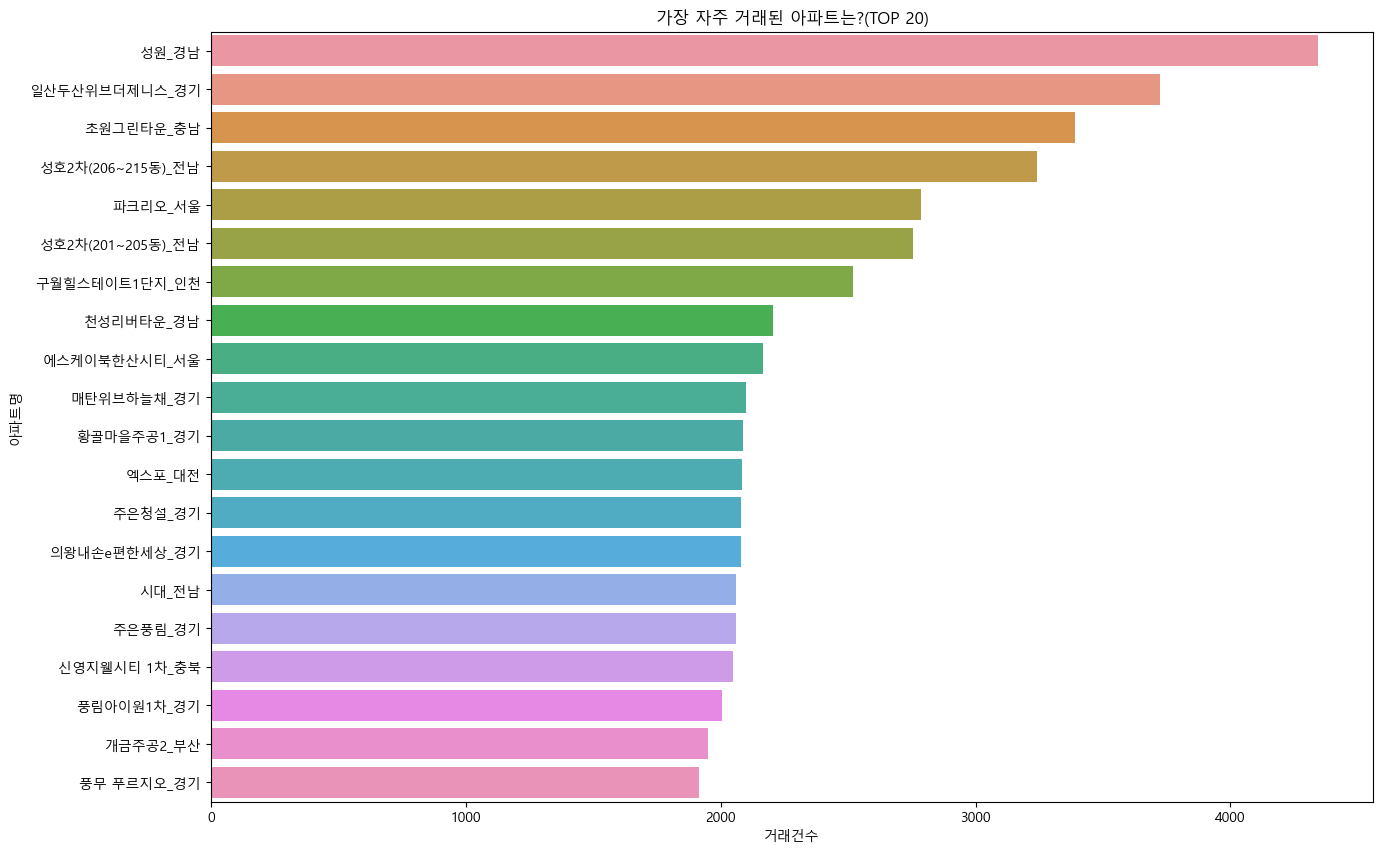

In [366]:
plt.figure(figsize = (15,10)) 

sns.barplot(data = apart_speculation_top20, x = '거래건수' , y='아파트_시도')

plt.ylabel('아파트명')

plt.title('가장 자주 거래된 아파트는?(TOP 20)')

plt.show()

# 가장 자주 거래된 층수 ( 사람들 몇층 선호?)

In [355]:
floor_count = apartUpdate_date.groupby('층',as_index=False).agg(count_floor=('층','count')).sort_values(by='count_floor',ascending= False)

In [358]:
floor_count = floor_count.rename(columns={"count_floor" : "거래건수"})

In [360]:
floor_count_top15 = floor_count.head(15)

In [361]:
floor_count_top15

,층,거래건수
8,5,364046
7,4,362548
6,3,352821
5,2,338278
4,1,307768
9,6,292924
10,7,278003
11,8,273383
12,9,268761
13,10,264027


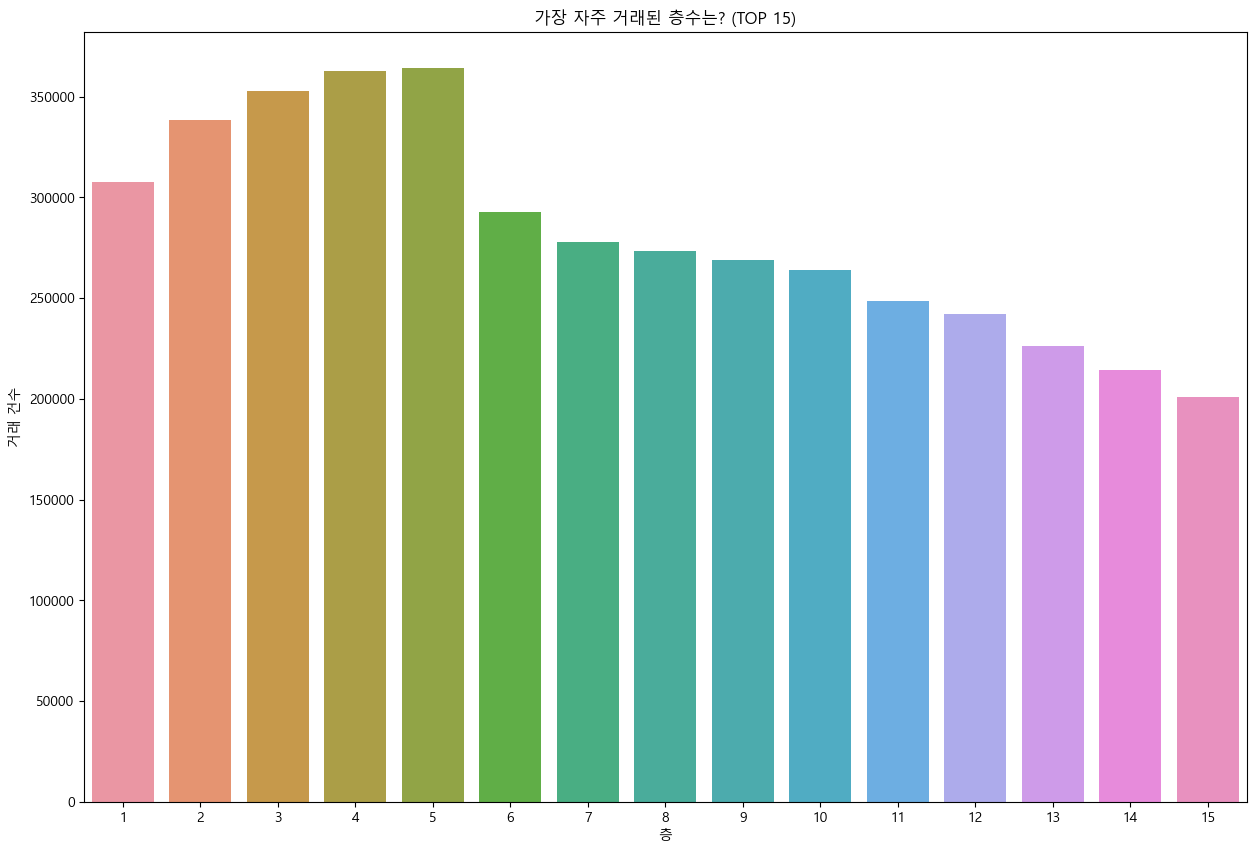

In [367]:
plt.figure(figsize = (15,10)) 

sns.barplot(data = floor_count_top15, x = '층' , y='거래건수')

plt.ylabel('거래 건수')

plt.title('가장 자주 거래된 층수는? (TOP 15)')

plt.show()

In [1]:
apartUpdate_date

NameError: name 'apartUpdate_date' is not defined